# Version 0.2
Some bugs fixed.

Encapsulate the bar game into a class. Observe num_bar changing with memory step. Try two ways to calculate the $excess$ value.
1. More crowded, less comfortable
2. Either comfortable or uncomfortable

Mean value decrease with increasing memory step?

## No strategy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

N = 1001
iter_num = 1500
bar_people_num = np.zeros(iter_num)
home_num = np.zeros(iter_num)
for i in range(iter_num):
    for j in range(N):
        rd = randint(0, 1)
        if(rd == 1):
            bar_people_num[i] += 1
        else:
            home_num[i] += 1

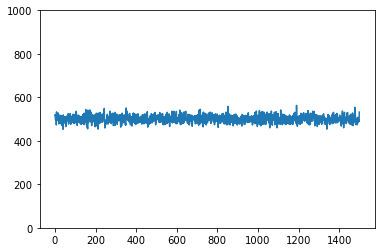

In [2]:
t_ax = [i for i in range(iter_num)]
plt.plot(t_ax, bar_people_num)
plt.ylim([0, 1000])
plt.show()

## With short-term memory
number of strategies: 2
number of memory step: 3

In [3]:
"""
CHEN Xiaolong
2021.11.19
Class Encapsulate
El-Farol Bar problem
"""
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
from random import choice
from random import choices
class BarGame():
    def __init__(self, iter_num=1000, N=101, m=3, s=2, cal_excess=0):
        self.iter_num = iter_num
        self.N = N
        self.m = m
        self.s = s
        self.dim = 2**m
        self.cal_excess = cal_excess
        self.d_arr = np.random.randint(0, 2, (N, s, self.dim))
        self.v_score = np.zeros((N, s))
        self.r_score = np.zeros(N)
        self.num_bar = []
        self.r_score_history = [[] for i in range(N)]
    
    # choose the best strategy
    def runGame(self):
        mu = randint(0, self.dim-1)
        N = self.N
        decision = np.zeros(N)
        for i in range(self.iter_num):
            num_going = 0
            for ag in range(N):
                # find the best strategy
                maxv = self.v_score[ag][0]
                choice_s = []
                for st in range(self.s):
                    if self.v_score[ag][st] > maxv:
                        maxv = self.v_score[ag][st]
                        choice_s.append(st)
                    elif self.v_score[ag][st] == maxv:
                        choice_s.append(st)
                cur_choice = choice(choice_s)
                decision[ag] = self.d_arr[ag][cur_choice][mu]
                if decision[ag] == 1:
                    num_going += 1
            self.num_bar.append(num_going)
            excess = self.calExcess_0(num_going, N) if self.cal_excess == 0 else self.calExcess_1(num_going, N)
            w = 1 if excess < 0 else 0
            for ag in range(N):
                for i in range(self.s):
                    self.v_score[ag][i] -= excess*(2*self.d_arr[ag][i][mu]-1)
                self.r_score[ag] -= excess*(2*decision[ag]-1)
                self.r_score_history[ag].append(self.r_score[ag])
            mu = (mu*2+w)%self.dim
            
    def runGame_1(self):
        mu = randint(0, self.dim-1)
        N = self.N
        decision = np.zeros(N)
        for i in range(self.iter_num):
            num_going = 0
            for ag in range(N):
                # find the strategy with certain weight
                sum_score = sum(self.v_score[ag])
                choice_weight = []
                if sum_score == 0:
                    cur_choice = choices([i for i in range(self.s)],[1 for i in range(self.s)])[0]
                else:
                    for st in range(self.s):
                        choice_weight.append(self.v_score[ag][st])
                    cur_choice = choices([i for i in range(self.s)],choice_weight)[0]
                decision[ag] = self.d_arr[ag][cur_choice][mu]
                if decision[ag] == 1:
                    num_going += 1
            self.num_bar.append(num_going)
            excess = self.calExcess_1(num_going, N) if self.cal_excess == 0 else self.calExcess_1(num_going, N)
            w = 1 if excess < 0 else 0
            for ag in range(N):
                for i in range(self.s):
                    # update v_score with 0 and 1 to avoid negative weights
                    self.v_score[ag][i] -= excess*(self.d_arr[ag][i][mu])
                self.r_score[ag] -= excess*(decision[ag])
                self.r_score_history[ag].append(self.r_score[ag])
            mu = (mu*2+w)%self.dim
    
    def calExcess_0(self, num_going, N):
        return (num_going - int(N*0.6)) / N
    
    def calExcess_1(self, num_going, N):
        if num_going - int(N*0.6) > 0:
            return 0
        else:
            return -1
    
    def getRealScore(self):
        return self.r_score
    
    def getScoreHistory(self):
        return self.r_score_history
    
    def getNumberofPeopleInBar(self):
        return np.array(self.num_bar)

### choose the best strategy

In [4]:
game_1 = BarGame(iter_num=2000, N=100, m=3, s=2, cal_excess=1)
game_1.runGame()

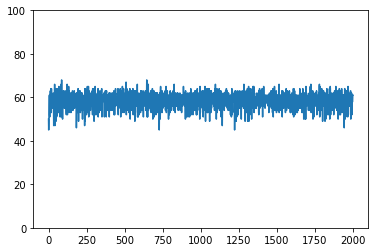

In [5]:
num_going = game_1.getNumberofPeopleInBar()
t_axis = [i for i in range(game_1.iter_num)]
plt.plot(t_axis, num_going)
plt.ylim([0, game_1.N])
plt.show()

### choose the best based on weight

In [6]:
game_2 = BarGame(iter_num=2000, N=100, m=3, s=2, cal_excess=1)
game_2.runGame_1()

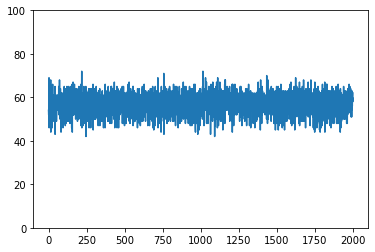

In [7]:
num_going = game_2.getNumberofPeopleInBar()
t_axis = [i for i in range(game_2.iter_num)]
plt.plot(t_axis, num_going)
plt.ylim([0, game_2.N])
plt.show()

## The effect of changing memory step
## Assumption 1: More crowded, more uncomfortable

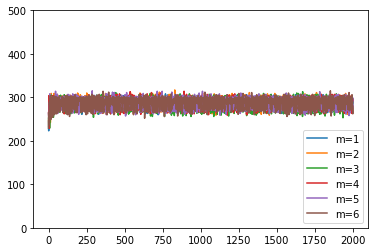

In [8]:
M_list = [1, 2, 3, 4, 5, 6]
var_list_1 = []
mean_list_1 = []
N_ag = 500
N_sample = 10
for M in M_list:
    tmp_var = []
    tmp_mean = []
    for sample in range(N_sample):
        cur_game = BarGame(iter_num=2000, N=N_ag, m=M, s=2)
        cur_game.runGame()
        num_bar = cur_game.getNumberofPeopleInBar()
        tmp_var.append(np.var(num_bar))
        tmp_mean.append(np.mean(num_bar))
    tmp_var = np.array(tmp_var)
    tmp_mean = np.array(tmp_mean)
    var_list_1.append(np.mean(tmp_var))
    mean_list_1.append(np.mean(tmp_mean))
    plt.plot(num_bar,label=f"m={M}")
plt.ylim([0, N_ag])
plt.legend()
plt.show()

In [ ]:
plt.plot(M_list, var_list_1)

In [ ]:
plt.plot(M_list, mean_list_1)
plt.show()

## Assumption 2: Either comfortable or uncomfortable

### Choose the best strategy

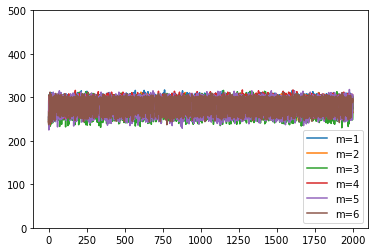

In [9]:
M_list = [1, 2, 3, 4, 5, 6]
var_list = []
mean_list = []
N_ag = 500
N_sample = 10
for M in M_list:
    tmp_var = []
    tmp_mean = []
    for sample in range(N_sample):
        cur_game = BarGame(iter_num=2000, N=N_ag, m=M, s=2, cal_excess=1)
        cur_game.runGame()
        num_bar = cur_game.getNumberofPeopleInBar()
        tmp_var.append(np.var(num_bar))
        tmp_mean.append(np.mean(num_bar))
    tmp_var = np.array(tmp_var)
    tmp_mean = np.array(tmp_mean)
    var_list.append(np.mean(tmp_var))
    mean_list.append(np.mean(tmp_mean))
    plt.plot(num_bar,label=f"m={M}")
plt.ylim([0, N_ag])
plt.legend()
plt.show()
# var_list = np.array(var_list)

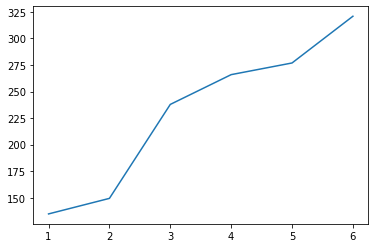

In [10]:
plt.plot(M_list, var_list)
plt.show()

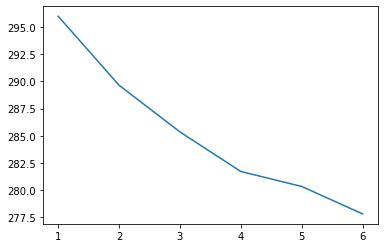

In [11]:
plt.plot(M_list, mean_list)
plt.show()

### Choose the strategy based on weight

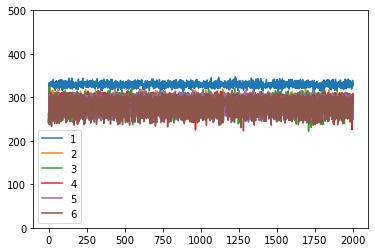

In [12]:
M_list = [1, 2, 3, 4, 5, 6]
var_list_2 = []
mean_list_2 = []
N_ag = 500
N_sample = 10
for M in M_list:
    tmp_var = []
    tmp_mean = []
    for sample in range(N_sample):
        cur_game = BarGame(iter_num=2000, N=N_ag, m=M, s=2)
        cur_game.runGame_1()
        num_bar = cur_game.getNumberofPeopleInBar()
        tmp_var.append(np.var(num_bar))
        tmp_mean.append(np.mean(num_bar))
    tmp_var = np.array(tmp_var)
    tmp_mean = np.array(tmp_mean)
    var_list_2.append(np.mean(tmp_var))
    mean_list_2.append(np.mean(tmp_mean))
    plt.plot(num_bar,label=f"{M}")
plt.ylim([0, N_ag])
plt.legend()
plt.show()

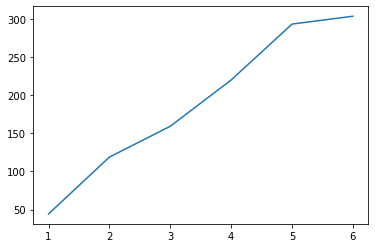

In [13]:
plt.plot(M_list, var_list_2)

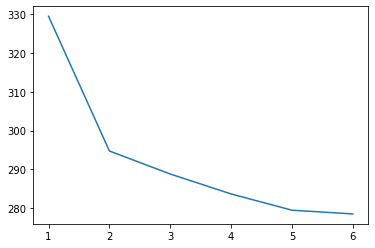

In [14]:
plt.plot(M_list, mean_list_2)
plt.show()